# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [0]:
df.iloc[range(3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [0]:
df[['animal', 'age']].iloc[[3,4,8]]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
df[df['visits'] > 3]

,animal,age,visits,priority


```Select the rows where the age is missing, i.e. is `NaN`.```

In [0]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
df[(df['age'] >= 2) & (df['age'] <= 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


```Change the age in row 'f' to 1.5.```

In [0]:
df.at['f', 'age'] = 1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
# using built in pandas functions
df['visits'].sum()

19

In [0]:
# using numpy
np.sum(df['visits'].values)

19

```Calculate the mean age for each different animal in `df`.```

In [0]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [0]:
df['k'] = [True, False, True, False, True, False, True, False, True, False]
print(df)
del df['k']
df

  animal  age  visits priority      k
a    cat  2.5       1      yes   True
b    cat  3.0       3      yes  False
c  snake  0.5       2       no   True
d    dog  NaN       3      yes  False
e    dog  5.0       2       no   True
f    cat  1.5       3       no  False
g  snake  4.5       1       no   True
h    cat  NaN       1      yes  False
i    dog  7.0       2       no   True
j    dog  3.0       1       no  False


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Count the number of each type of animal in `df`.```

In [0]:
df.groupby('animal').size()

animal
cat      4
dog      4
snake    2
dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
df.sort_values(by=['age'], ascending=False)
print(df)
df.sort_values(by=['visits'])
df

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [0]:
df.loc[df['priority'] == 'yes', 'priority'] = True
df.loc[df['priority'] == 'no', 'priority'] = False
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
df.loc[df['animal'] == 'snake', 'animal'] = 'python'
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
 pd.pivot_table(df, index=['animal'])

,age,priority,visits
animal,,,
cat,2.333333,0.75,2.0
dog,5.000000,0.25,2.0
python,2.500000,0.00,1.5


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
df = pd.DataFrame({'age':np.random.randint(20, 65, size=1000), 'skill':np.random.normal(0.5, 0.3, 1000), 'height':np.round(np.random.uniform(1.5, 2, 1000), 2)})
df

,age,skill,height
0,30,1.132311,1.83
1,63,0.631972,1.51
2,21,0.779827,1.61
3,28,0.843742,1.87
4,57,0.701083,1.72
5,24,0.402176,1.84
6,60,0.922681,1.70
7,54,1.184370,1.54
8,26,0.390848,1.74
9,42,0.925438,1.78


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
df['salary'] = 1000*((df['age']*df['age']) / 1000 + 1.7 * df['skill'] + np.exp(-(df['height'] - 1.7)) ** 2)
df

,age,skill,height,salary
0,30,1.132311,1.83,3595.979868
1,63,0.631972,1.51,6505.637426
2,21,0.779827,1.61,2963.923373
3,28,0.843742,1.87,2930.132393
4,57,0.701083,1.72,5401.631013
5,24,0.402176,1.84,2015.482662
6,60,0.922681,1.70,6168.557809
7,54,1.184370,1.54,6306.556862
8,26,0.390848,1.74,2263.557206
9,42,0.925438,1.78,4189.388485


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
group = df.groupby(lambda x: df['age'].loc[x]//10).agg({'salary': 'mean', 'height': 'max', 'age': 'count'})
group = group.rename(columns={'age': 'count rows'})
group


,salary,height,count rows
2,2442.499724,2.00,231
3,2888.320223,2.00,219
4,3816.264558,2.00,202
5,4739.225825,1.99,236
6,5553.656048,2.00,112


```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
group = df.groupby(['age']).agg({'salary': 'mean', 'height': 'sum'})
group['mean_salary_over_height'] = group['salary']/group['height']
group

,salary,height,mean_salary_over_height
age,,,
20,2358.090302,31.54,74.765070
21,2292.316203,35.68,64.246530
22,2233.004487,44.67,49.988907
23,2362.114122,37.19,63.514765
24,2400.212348,38.74,61.956953
25,2504.909799,46.39,53.996762
26,2396.827006,44.34,54.055638
27,2686.295334,41.80,64.265439
28,2515.895910,32.18,78.181974


```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

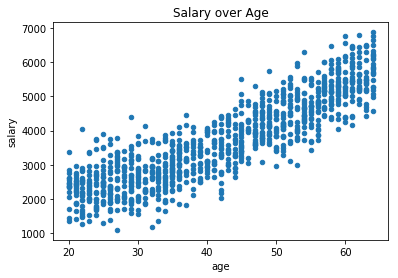

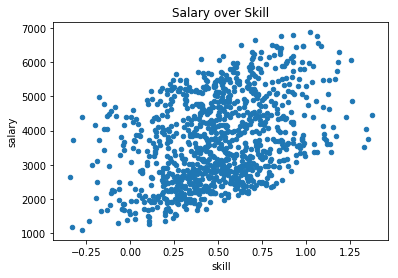

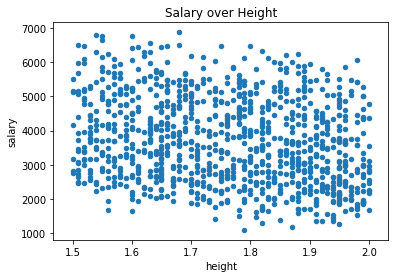

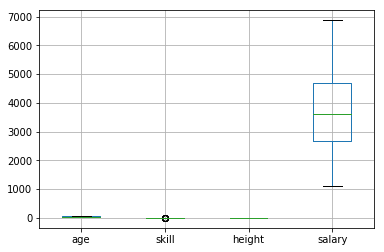

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(x = 'age', y = 'salary', kind="scatter", title="Salary over Age")
df.plot(x = 'skill', y = 'salary', kind="scatter", title="Salary over Skill")
df.plot(x = 'height', y = 'salary', kind="scatter", title="Salary over Height")
plt.show()

pd.DataFrame.boxplot(df)

```Save the result as a csv```

In [0]:
df.to_csv('data_frame_result.csv')

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [8]:
# What is oldest house in the dataset (YearBuilt)?
idx_result = df['YearBuilt'].idxmin()
year_built = df.loc[idx_result]['YearBuilt']
print('The oldest house in the dataset is ' + str(idx_result) + ' (built in ' + str(year_built) + ')')

The oldest house in the dataset is 1349 (built in 1872.0)


In [10]:
# What is the highest price (SalePrice) of houses built in that year?
idx_result = df[df['YearBuilt']==df['YearBuilt'].min()]['SalePrice'].idxmax()
price = df.loc[idx_result]['SalePrice']
print('The highest price of houses built in that year is ' + str(price))

The highest price of houses built in that year is 122000.0


In [11]:
# What is the mean area (LotArea) of houses?
df['LotArea'].mean()

10516.828082191782

In [12]:
# What is the 50-percentile of the area (LotArea) of houses?
df['LotArea'].quantile()

9478.5

In [13]:
# What is more common: having a fireplace (Fireplaces) in the house, or not having one?
not_having = len(df[df['Fireplaces']==0])
having = len(df[df['Fireplaces']!=0])
if having > not_having:
    print('Having is more common: ' + str(having) + ' > ' + str(not_having))
else:
    print('Not having is more common: ' + str(not_having) + ' > ' + str(having))

Having is more common: 770 > 690


In [14]:
# What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
df[df['PoolArea'] > 0]['SalePrice'].mean()

288138.5714285714

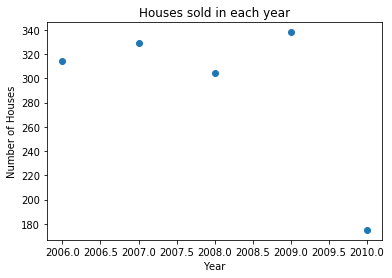

In [15]:
# How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
plt.plot(df['YrSold'].value_counts(), 'o')
plt.title('Houses sold in each year');
plt.ylabel('Number of Houses');
plt.xlabel('Year');

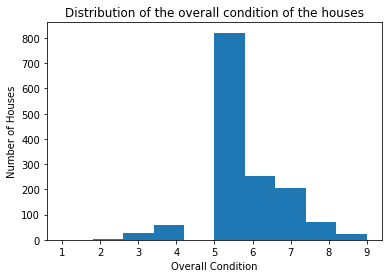

In [17]:
# What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
plt.hist(df['OverallCond']);
plt.title('Distribution of the overall condition of the houses');
plt.ylabel('Number of Houses');
plt.xlabel('Overall Condition');

In [20]:
# For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
for name, group in groups:
    print("Fireplaces: " + str(name))
    print("--> Mean price of house: " + str(group['SalePrice'].mean()))
    print("--> Mean age of house: " + str(group['YearBuilt'].apply(lambda year: 2019-year).mean()))
    print("--> Count of distinct FullBath values: " + str(group['FullBath'].nunique()))

Fireplaces: False
--> Mean price of house: 150977.98314606742
--> Mean age of house: 78.65730337078652
--> Count of distinct FullBath values: 4
Fireplaces: True
--> Mean price of house: 170047.17889908256
--> Mean age of house: 30.779816513761467
--> Count of distinct FullBath values: 4


In [19]:
# Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
groups = df[df['MSSubClass'] > 60].groupby(lambda x: df.loc[x]['MSSubClass'] % 20 == 0)
for name, group in groups:
    print("MSSubClass is a multiple of 20? " + str(name))
    print("--> Mean of OverallQual: " + str(group['OverallQual'].mean()))
    print("--> Max of OverallQual: " + str(group['OverallQual'].max()))
    print("--> Min of OverallQual: " + str(group['OverallQual'].min()))
    print("--> Standart deviation of OverallQual: " + str(group['OverallQual'].std()))

MSSubClass is a multiple of 20? False
--> Mean of OverallQual: 5.556179775280899
--> Max of OverallQual: 10
--> Min of OverallQual: 3
--> Standart deviation of OverallQual: 1.1930547655966786
MSSubClass is a multiple of 20? True
--> Mean of OverallQual: 6.389908256880734
--> Max of OverallQual: 9
--> Min of OverallQual: 4
--> Standart deviation of OverallQual: 1.1110210319700953


## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
S_FEET2S_METER = 0.092903
df['LotAreaInSquaredMeters']=df['LotArea']*S_FEET2S_METER
df['SumFlrSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['GarageAreaSqrt'] = df['GarageArea']**0.5
df['LotAreaBedroomAbvGrPlusOne'] = df['LotArea'] / (df['BedroomAbvGr']+1)
l = pd.merge((df.groupby('YearBuilt').mean()['LotArea'] + 1e-5).reset_index(),df,on='YearBuilt')
df['LotAreaOverMean'] = l['LotArea_y']/l['LotArea_x']
df['Rank'] = df['LotArea'].rank()
df[pd.get_dummies(df['LotConfig']).columns] = pd.get_dummies(df['LotConfig'])
names=["LotAreaInSquaredMeters","SumFlrSF","GarageAreaSqrt","LotAreaBedroomAbvGrPlusOne","LotAreaOverMean","Rank","Corner","CulDSac","FR2","FR3","Inside"]

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [0]:
data = df[names]
target = df["SalePrice"]/np.max(df["SalePrice"])

train_features, test_features, train_target, test_target = train_test_split(data, target)
 
linear_regression = LinearRegression(normalize =True)
linear_regression.fit(train_features, train_target)

plt.plot([0,1],[0,1],'k--')
plt.scatter(test_target,linear_regression.predict(test_features))
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")
plt.title('Model Predicted Result Over Target')
mean_squared_error(test_target,linear_regression.predict(test_features))

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [0]:
for name in names:
    data[name+"Pow2"]=data[name]**2
    data[name+"Pow3"]=data[name]**3